In [1]:
from roboticstoolbox import *
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt
from spatialmath import *
import pandas as pd

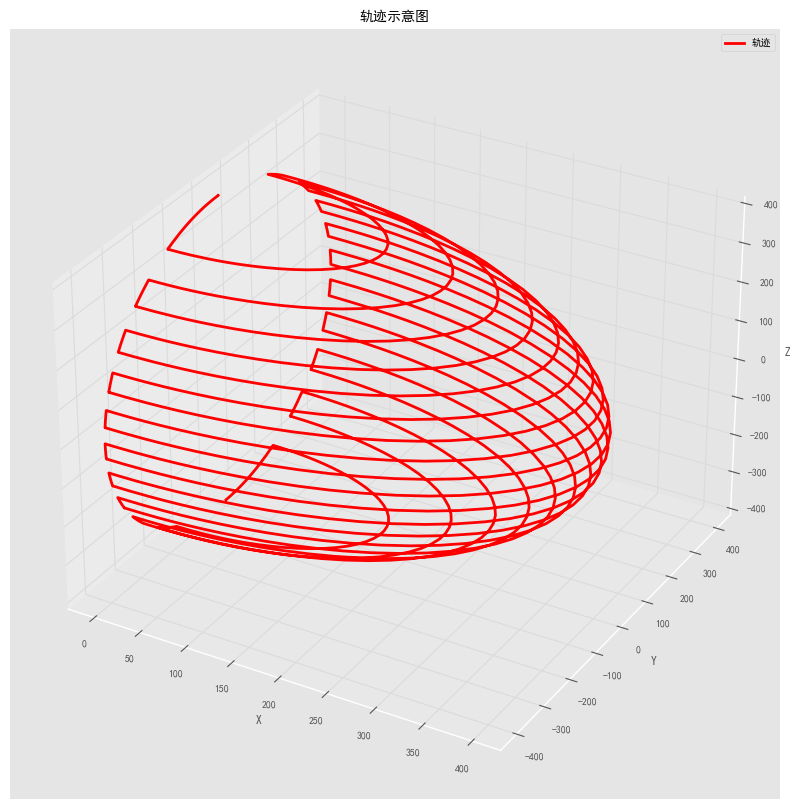

In [2]:
p0 = [0, 0, 0]
R = 400
 
t1 = 10
t2 = 20
t3 = 50

x_ = R / t1
points = []
theta_last = 0
for i in range(t1 * 2):
    z = R - (i + 1) * x_
    theta = np.arccos(z / R)
    theta_list = mtraj(trapezoidal, theta_last, theta, t2).q.flatten()
    phi_list = mtraj(trapezoidal, pi/2*(-1)**i, pi/2*(-1)**(i+1), t3).q.flatten()
    theta_last = theta
    
    for j in range(t2):
        theta = theta_list[j]
        x = p0[0]
        y = R * np.sin(theta) * (-1)**i + p0[1]
        z = - R * np.cos(theta) + p0[2]
        a = np.degrees(0)
        b = np.degrees(0)                
        c = np.degrees(0)    
        points.append([x, y, z, a, b, c])
    
    for j in range(t3):
        phi = phi_list[j]
        x = R * np.sin(theta) * np.cos(phi) + p0[0]
        y = R * np.sin(theta) * np.sin(phi) + p0[1]
        z = - R * np.cos(theta) + p0[2]
        a = np.degrees(0)
        b = np.degrees(0)                
        c = np.degrees(0)    
        points.append([x, y, z, a, b, c])
points = np.array(points)

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False 

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:,0], points[:,1], points[:,2], label='轨迹', color='red', linewidth=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('轨迹示意图')
ax.legend()
plt.savefig('轨迹示意图2.svg')
plt.show()

In [3]:
def draw_line(p1, p2, points, t=10):
    point = mtraj(trapezoidal, p1, p2, t).q
    point = np.hstack((point, np.zeros((t, 3))))
    points = np.vstack((points, point))
    return points

def de_casteljau(control_points, t):
    points = np.array(control_points)
    while len(points) > 1:
        points = [(1 - t) * points[i] + t * points[i + 1] for i in range(len(points) - 1)]
    return points[0]

def draw_bezier(control_points, points, t):
    t_ = mtraj(trapezoidal, 0, 1, t).q
    for t__ in t_:
        point = np.hstack((de_casteljau(control_points, t__), [0,0,0]))
        points = np.vstack((points, point))
    return points        


In [4]:
points = draw_line([0, 0, 400], [0, 400, 400], points)
points = draw_line([0, 400, 400], [0, 400, 0], points)
points = draw_line([0, 400, 0], [0, 500, 0], points)
points = draw_line([0, 500, 0], [0, 500, 250], points)
points = draw_line([0, 500, 250], [0, 450, 200], points)
points = draw_line([0, 450, 200], [0, 500, 250], points)
points = draw_line([0, 500, 250], [0, 500, 0], points)
points = draw_line([0, 500, 0], [0, 600, 0], points)

theta_ = mtraj(trapezoidal, 0, 2*pi, 40).q
x = np.zeros((40,1))
y = 45 * np.cos(theta_-pi/2) + 600
z = 125*np.sin(theta_-pi/2) + 125
a = np.degrees(np.zeros((40,1)))
b = np.degrees(np.zeros((40,1)))
c = np.degrees(np.zeros((40,1)))
point = np.column_stack((x.ravel(), y.ravel(), z.ravel(), a.ravel(), b.ravel(), c.ravel()))
points = np.vstack((points, point))

points = draw_line([0, 600, 0], [0, 725, 0], points)
points = draw_line([0, 725, 0], [0, 725, 250], points)
points = draw_line([0, 725, 250], [0, 675, 200], points)
points = draw_line([0, 675, 200], [0, 725, 250], points)
points = draw_line([0, 725, 250], [0, 725, 0], points)
points = draw_line([0, 725, 0], [0, 850, 0], points)

points = draw_bezier([[0, 850, 0], [0, 800, 0], [0, 750, 100], [0, 805, 220], [0, 850, 250]], points, t=20)
points = draw_bezier([[0, 850, 250], [0, 805, 220], [0, 750, 100], [0, 800, 0], [0, 850, 0]], points, t=20)
points = draw_bezier([[0, 850, 0], [0, 900, 0], [0, 900, 95], [0, 880, 145], [0, 810, 125]], points, t=20)
points = draw_bezier([[0, 810, 125], [0, 880, 145], [0, 900, 95], [0, 900, 0], [0, 850, 0]], points, t=20)

points = draw_line([0, 850, 0], [0, 1025, 0], points)
points = draw_line([0, 1025, 0], [0, 975, 125], points)
points = draw_line([0, 975, 125], [0, 1025, 0], points)
points = draw_line([0, 1025, 0], [0, 1065, 125], points)
points = draw_line([0, 1065, 125], [0, 1005, -62.5], points)
points = draw_bezier([[0, 1005, -62.5], [0, 956, -150], [0, 955, -115]], points, t=10)
points = draw_bezier([[0, 955, -115], [0, 956, -150], [0, 1005, -62.5]], points, t=10)
points = draw_line([0, 1005, -62.5], [0, 1025, 0], points)

points = draw_line([0, 1025, 0], [0, 1125, 0], points)
points = draw_line([0, 1125, 0], [0, 1125, 250], points)
points = draw_line([0, 1125, 250], [0, 1125, 0], points)
points = draw_bezier([[0, 1125, 0], [0, 1125, -7], [0, 1155, -10], [0, 1170, 40]], points, t=10)
points = draw_bezier([[0, 1170, 40], [0, 1155, -10], [0, 1125, -7], [0, 1125, 0]], points, t=10)

points = draw_line([0, 1125, 0], [0, 1250, 0], points)
points = draw_line([0, 1250, 0], [0, 1350, 125], points)
points = draw_line([0, 1350, 125], [0, 1250, 125], points)
points = draw_line([0, 1250, 125], [0, 1350, 125], points)
points = draw_line([0, 1350, 125], [0, 1250, 0], points)
points = draw_line([0, 1250, 0], [0, 1350, 0], points)

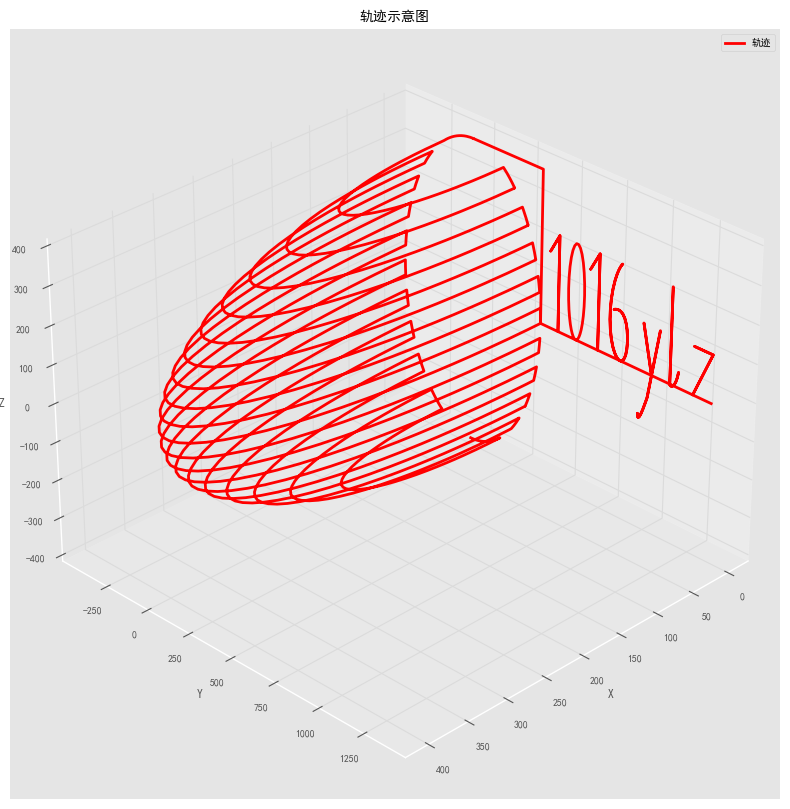

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(points[:,0], points[:,1], points[:,2], label='轨迹', color='red', linewidth=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('轨迹示意图')
ax.legend()
ax.view_init(elev=30, azim=45)
plt.savefig('轨迹示意图3.svg')
plt.show()

In [6]:
df = pd.DataFrame(points)
df.to_csv('实验二.csv', index=False, header=False)